<h1>Построение круговой диаграммы </h1>
Выполните построение круговой диаграммы по данным файла Electric_Сars.csv, содержащим сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству моделей (столбец Brand) и выполните их сортировку по столбцу TopSpeed_KmH.

2.	Используйте библиотеку matplotlib, чтобы построить круговую диаграмму по полученным в первом пункте данным. Диаграмма должна показывать долю в процентном отношении первых 5 и всех остальных моделей (rest). 

3.	Покажите на диаграмме наименование брендов и соответствующую им долю в процентах.

4.	Увеличьте радиус диаграммы в 3 раза.

5.	Сохраните график под именем aut6.  o_pie.png.

Как долж



 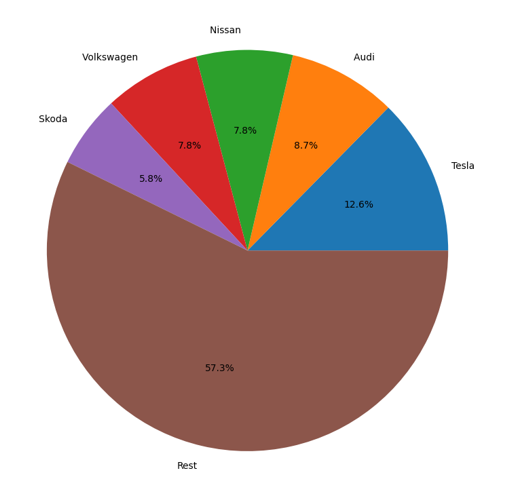

Напишите код программы в самостоятельно созданном Python-ноутбуке и прикрепите его в LMS. Чтобы начать писать программу, можно использовать следующий код:


```

import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Electric_Car.c
```sv')но получиться:

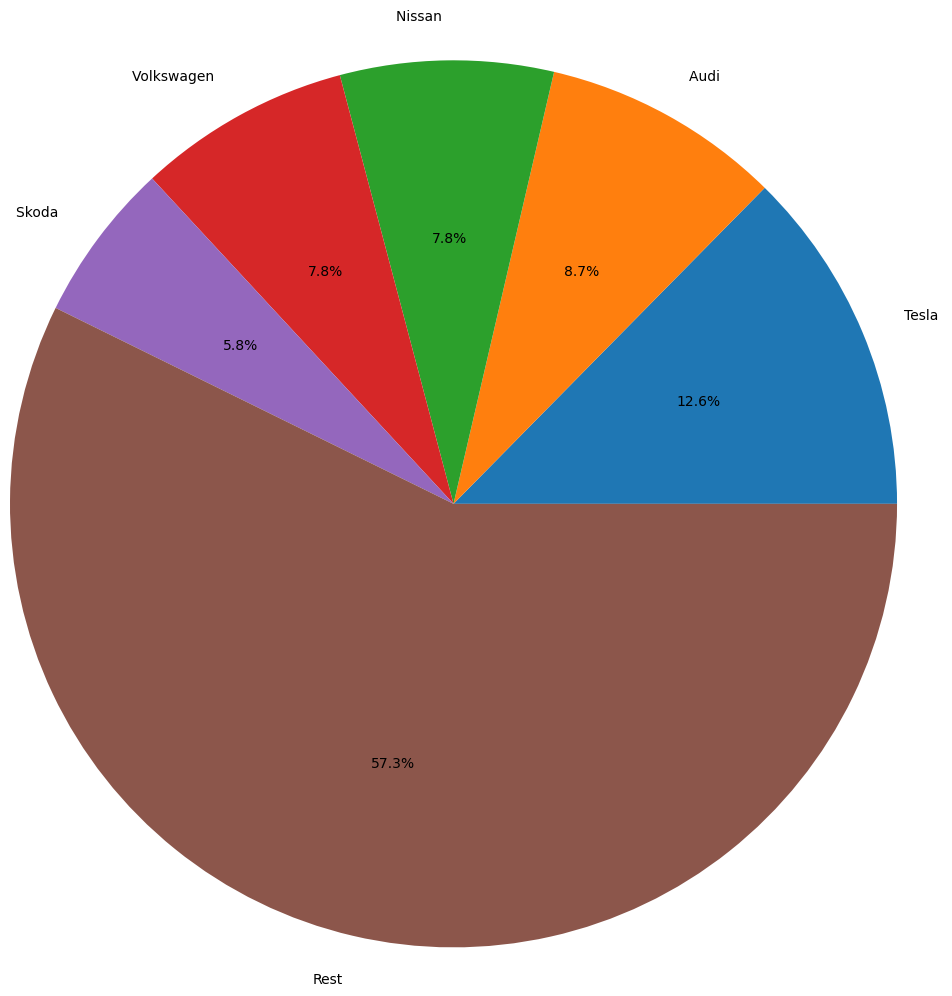

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('Electric_Car.csv')


brand_data = df.groupby('Brand').agg(
    ModelCount=('Model', 'count'),
    MaxTopSpeed=('TopSpeed_KmH', 'max')
).sort_values(by='MaxTopSpeed', ascending=False)

# print(brand_data)

brand_data2 = brand_data.sort_values(by="ModelCount", ascending=False)

top5 = brand_data2.head(5)
rest = brand_data2.ModelCount[5:].sum()

models = list(top5.index) + ["Rest"]
values = list(top5.ModelCount)
values.append(rest)

plt.pie(values, labels=models, autopct='%1.1f%%', radius=3)
plt.savefig("auto_pie.png", bbox_inches='tight')

<h1>Построение столбчатой диаграммы</h1>
Постройте горизонтальную столбчатую диаграмму по данным файла Electric_Сars.csv, который содержит сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству различных моделей (столбец Brand) и выполните сортировку по количеству.

2.	Используйте библиотеку matplotlib, чтобы построить горизонтальную столбчатую диаграмму по данным из первого пункта.

3.	При построении диаграммы укажите наименование модели и соответствующее ей количество.

4.	Сохраните график под именем e_barh.png.sa

v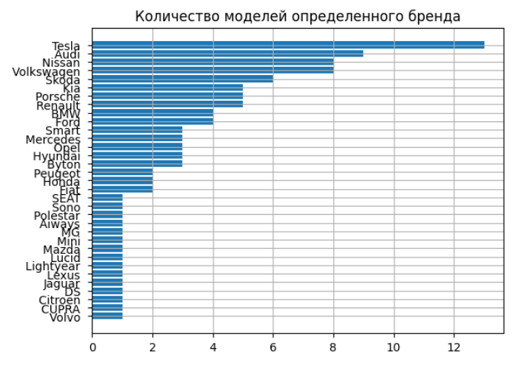e_barh.png.

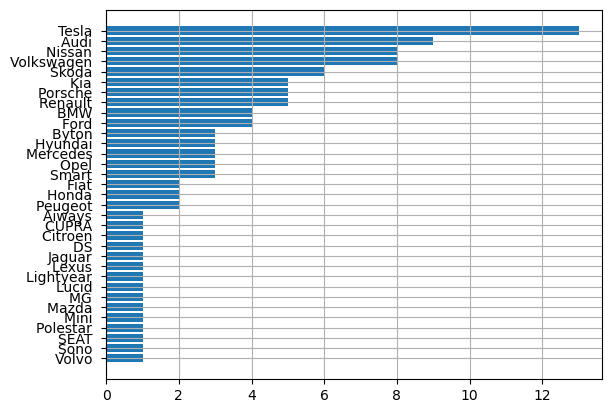

In [46]:
mdls = df.groupby("Brand").agg(ModelCount=('Model', 'count')).sort_values(by=['ModelCount', 'Brand'], ascending=[True, False])

labels = list(mdls.index)
values = list(mdls.ModelCount)
plt.grid()
plt.barh(labels, values)
plt.savefig('saved_figure_barh.png')

<h1>Построение и визуализация 3D-цилиндра</h1>

Напишите программу для построения и визуализации 3D-цилиндра с помощью библиотеки `matplotlib`.

### Шаги выполнения задания:

1. Сформируйте вершины для построения цилиндра из 20 угловых секторов. Сначала постройте вершины одного основания (круга) — используйте углы поворота и радиус окружности равный 1.

Координаты вершин основания определяются по формуле:

$$0, \cos\left(\frac{2 \pi i}{N}\right), \sin\left(\frac{2 \pi i}{N}\right)$$

гд$$(\frac{2 \pi i}{N})$$ \pi i}{N}\) задает углы поворота на жм шаге \(i\).

2. Аналогично постройте вершины второго основания, взяв высоту равную 1. Координаты вершин основания можно найти по формуле:

$$1, \cos\left(\frac{2 \pi i}{N}\right), \sin\left(\frac{2 \pi i}{N}\right)$$

3. Используйте библиотеку `spatial`, чтобы сформировать грани для построения цилиндра из 20 угловых секторов.

4. Создайте сетку для построения цилиндра.

5. Визуализируйте полученный цилиндр.

6. Сохраните изображение в формате STL.
ажение в формате stl.


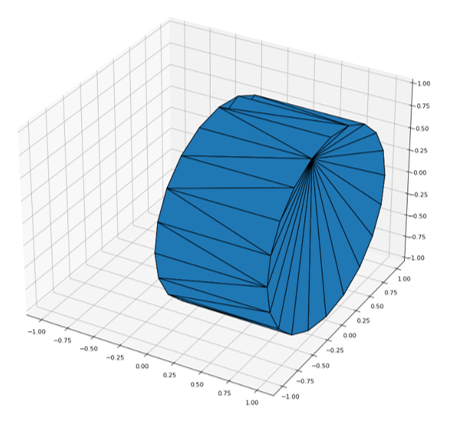
Как должно получиться:

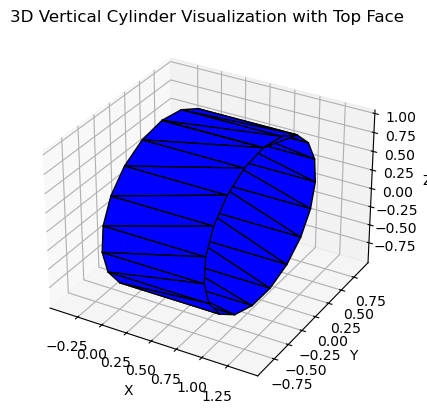

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from stl import mesh

def create_cylinder(cx, cy, cz, r, h, resolution=20):
    # Создание вершин для нижнего основания
    phi = np.linspace(0, 2 * np.pi, resolution)
    vertices = np.empty((0, 3))

    # Вершины нижнего основания (z = cz)
    for p in phi:
        z = cx + r * np.cos(p)
        y = cy + r * np.sin(p)
        x = cz  # Высота для нижнего основания
        vertices = np.append(vertices, [[x, y, z]], axis=0)

    # Вершины верхнего основания (z = cz + h)
    for p in phi:
        z = cx + r * np.cos(p)
        y = cy + r * np.sin(p)
        x = cz + h  # Высота для верхнего основания
        vertices = np.append(vertices, [[x, y, z]], axis=0)

    return vertices

# Создание координат вершин для вертикального цилиндра
vertices = create_cylinder(0, 0, 0, 1, 1, resolution=20)

# Создание граней для цилиндра
n = len(vertices) // 2  # Количество вершин нижнего основания
faces = []

# Грани между нижним и верхним основаниями
for i in range(n):
    next_i = (i + 1) % n  # Индекс следующей вершины
    # Левая грань
    faces.append([vertices[i], vertices[next_i], vertices[next_i + n]])
    # Правая грань
    faces.append([vertices[i], vertices[next_i + n], vertices[i + n]])

# Добавление верхней грани
top_face = []
for i in range(n):
    top_face.append(vertices[i + n])  # Вершины верхнего основания

# Создание верхней грани, которая будет видна по оси Y
top_y_face = []
for i in range(n):
    top_y_face.append([vertices[i + n][0], vertices[i + n][1], vertices[i + n][2]])  # Вершины верхнего основания

faces.append(top_face)  # Добавляем верхнюю грань в список граней
faces.append(top_y_face)  # Добавляем верхнюю грань рядом с осью Y

# Создание сетки для цилиндра
cylinder_mesh = mesh.Mesh(np.zeros(len(faces), dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cylinder_mesh.vectors[i][j] = f[j]

# Визуализация полученного цилиндра
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Изменение цвета заливки на синий
ax.add_collection3d(Poly3DCollection(cylinder_mesh.vectors, facecolors='blue', edgecolors='black'))

# Установка границ графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vertical Cylinder Visualization with Top Face')

# Установка равных масштабов
max_range = np.array([vertices[:, 0].max() - vertices[:, 0].min(),
                      vertices[:, 1].max() - vertices[:, 1].min(),
                      vertices[:, 2].max() - vertices[:, 2].min()]).max() / 2.0

mid_x = (vertices[:, 0].max() + vertices[:, 0].min()) * 0.5
mid_y = (vertices[:, 1].max() + vertices[:, 1].min()) * 0.5
mid_z = (vertices[:, 2].max() + vertices[:, 2].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

# Сохранение в формат STL
cylinder_mesh.save('vertical_cylinder_with_top_face.stl')


Note: you may need to restart the kernel to use updated packages.
